# Basic Spectrogram in Python

Developed by A. R. Azari - 3/16/2019

This notebook demonstrates for example random data, spectrograms (3 dimensional data plots of time by energy/frequency vs flux/intensity) that are common within space physics and other fields. The usage in this notebook is created for example data as stored in a Pandas dataframe.

There are a few ways to make spectrograms with Python using matplotlib including commands such as [pcolormesh](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolormesh.html), [pcolor](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pcolor.html), [specgram](https://matplotlib.org/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py), [contourf](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contourf.html), and [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to name a few. 

I personally prefer pcolormesh for spacecraft data as you can see without interpolation where NaN and zero values fall and this is what will be demonstrated for this data.

You can see other examples of this within [Lab 3 of Data Visualization and Statistics in Geosciences](https://github.com/astro-abby/data_vis_statistics_geosciences/blob/master/Lab3/Lab3_JupiterFlyBy.ipynb).

## Part 1. Imports and Setting Up Environment

In [1]:
#import the required packages for plotting

#plotting requirements
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm #for log normalizing
import matplotlib.dates as mdt        #for adjustment of datetime axis


#data requirements
import numpy as np
import pandas as pd
import datetime as dt

#set up of random seed value
randomSeedValue = 3000
np.random.seed(randomSeedValue)

#set up environment to plot inline
%matplotlib inline

## Part 2. Set Up Example Data

I demonstrate here how you can use Pandas dataframes to then use pcolormesh to make spectrograms. This is easier with non-dataframe data however, the Pandas functionality is quite extensive and useful to have data stored as this type. 

In [2]:
#set up for 5 minutes cadence a datetime array for our dataframe
start = dt.datetime(2005, 1, 1)
stop = dt.datetime(2005, 1, 5)
timeIndex = np.arange(start, stop, dt.timedelta(minutes = 20))
length = len(timeIndex)

#create for 10 energy levels a log spacing of values
eRange = 10
#from power start to stop
eRangeNums = np.logspace(start = 1, stop = 3, num = eRange)

#make column names from energy range 0 to 9
colNames = ['{:d}_Level'.format(e) for e in range(eRange)]


#set up our pandas dataframe and fill with 10
data = pd.DataFrame(index = timeIndex, data = np.full([length, eRange], 10), columns = colNames)

#fill in with random data that scales roughly with the energy range of the data
data.loc[:, :] = (data.loc[:, :])+(eRangeNums)*np.random.rand(length,eRange)


## Part 3. Insert Some Invalid Values


In [3]:
#remove 5% of values and assign randomly to nan or to 1
loopLen = np.int(0.05*data.size)
for l in (range(loopLen)):
    #pick random columns and index
    randCol = np.random.choice(colNames)
    randInd = np.random.choice(data.index)
    #pick if a nan or a 1. Let's say that 1 is not valid 
    #but it's not a missing data point either
    inputType = np.random.choice([1, np.nan])
    data.loc[randInd, randCol] = inputType


## Part 4. Create Spectrogram

This is a basic spectrogram with some formatting associated with the issues arising in Pandas and time indexing. You can find more simplistic examples in the Python documentation linked above.

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


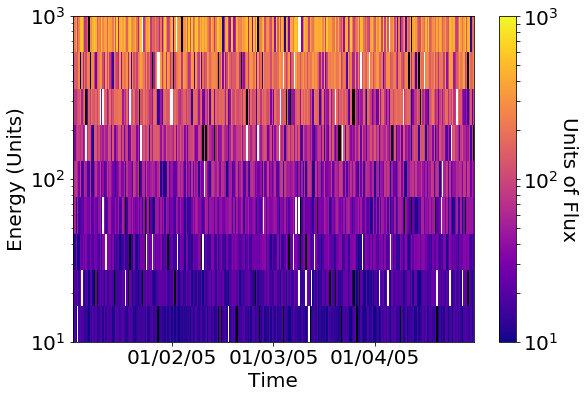

In [4]:
#set up our mesh grid

#notice - there is a conversion here of BOTH the type and of the date2num
timeValues, energyValues = np.meshgrid(mdt.date2num(data.index.to_pydatetime()), eRangeNums)

#set up fontsizes for our plot
baseSize = 20

#set up figure
fig = plt.figure(figsize=(9, 6))
gs = plt.GridSpec(1, 1, hspace=0.0, wspace=0.0, right = 0.9)
ax = fig.add_subplot(gs[0,0])

#we need to get the values and transpose from our dataframe for
#the right format with pcolormesh
fluxValues = np.transpose(data.values)



#we make the color bar range from blue to purple, the normalization to be logged
#we set the lower limit to 10, again knowing that that's our auto default
#but that we have values less than this

#https://matplotlib.org/2.0.1/examples/color/colormaps_reference.html for other options
p = ax.pcolormesh(timeValues, energyValues, fluxValues, cmap = 'plasma', norm = LogNorm(), vmin = 10, 
                  vmax = np.nanmax(data.values))

#when these are used in conjunctino with vmin and vmax you can set
#the nan values AND the under vmin values to different colors
#this is useful in this case as we have both missing AND
#invalid values
p.cmap.set_under('w')
p.cmap.set_bad('k')


#Set up the colorbar
cb = fig.colorbar(p)
cb.set_label('Units of Flux', labelpad = 20, fontsize = baseSize, rotation = 270)
cb.ax.tick_params(labelsize = baseSize)


#set up axis labels and formatting
ax.set_yscale('Log')
ax.set_xlabel('Time', fontsize = baseSize)
ax.set_ylabel('Energy (Units)', fontsize = baseSize)

#x-axis format as days
ax.xaxis.set_major_locator(mdt.DayLocator())
ax.xaxis.set_major_formatter(mdt.DateFormatter('%D'))

#trim start and stop
ax.set_xlim([start + dt.timedelta(minutes = 30), stop - dt.timedelta(minutes = 30)])


#finally make large labels
ax.tick_params(labelsize = baseSize)
plt.savefig('./Figures/ExampleSpectrogram.png')


### Note on warning thrown due to the presence of NaN values [here](https://github.com/matplotlib/matplotlib/pull/5451) from the developers. 